<AxesSubplot: xlabel='Parametr fanout', ylabel='Doba porovnání (s)'>

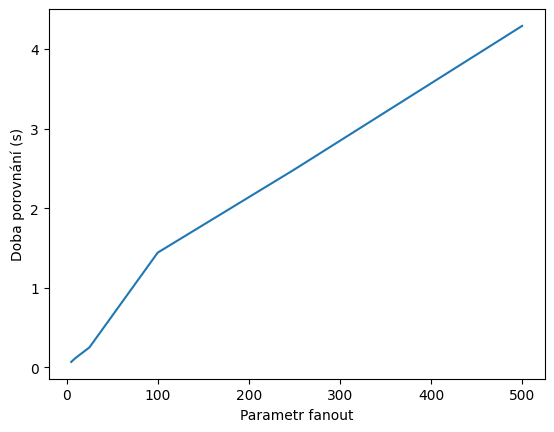

In [30]:
import time
import pandas as pd
import librosa

from hash.fanout import get_hashes_from_peaks_fanout as fanout
from freq.bands import get_peak_frequencies_bands as bands
from util.compare import compare_fingerprints

global_params = {"sr": 11_025, "n_fft": 2048, "hop_length": 2048 // 4}
bands_params = {"avg_window": 10, **global_params}
fanout_kwargs = {"fan_out": 5, "tail_size": 1}

recording_file = "samples/record.wav"
music_file = "samples/music.wav"

record, _ = librosa.load(recording_file, sr=global_params["sr"])
music, _ = librosa.load(music_file, sr=global_params["sr"])

def measure_fanout(fan_out):
    music_fingerprints = fanout(bands(music, **global_params), fan_out=fan_out, tail_size=1)
    start_time = time.process_time()
    result = compare_fingerprints(fanout(bands(record, **global_params), fan_out=fan_out, tail_size=1), music_fingerprints)[0]
    end_time = (time.process_time() - start_time)
    return end_time, result["ratio"], len(music_fingerprints)

measure_fanout(5)

data = {
    5: measure_fanout(5),
    10: measure_fanout(10),
    25: measure_fanout(25),
    100: measure_fanout(100),
    250: measure_fanout(250),
    500: measure_fanout(500),
}

ser_time = pd.Series({k: v[0] for k, v in data.items()})
ser_time.plot(xlabel="Parametr fanout", ylabel="Doba porovnání (s)")


<AxesSubplot: xlabel='Parametr fanout', ylabel='Procentuální shoda'>

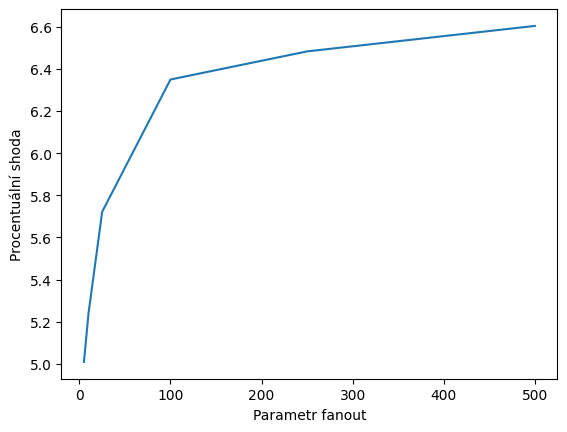

In [31]:
ser_ratio = pd.Series({k: v[1] * 100 for k, v in data.items()})
ser_ratio.plot(xlabel="Parametr fanout", ylabel="Procentuální shoda")


<AxesSubplot: xlabel='Parametr fanout', ylabel='Počet otisků pro skladbu'>

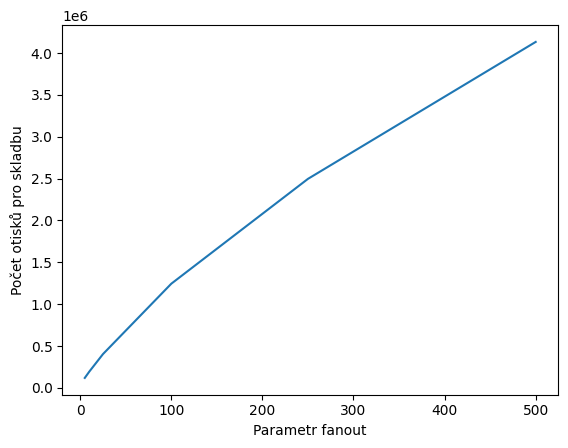

In [32]:
ser_hashes = pd.Series({k: v[2] for k, v in data.items()})
ser_hashes.plot(xlabel="Parametr fanout", ylabel="Počet otisků pro skladbu")